#### The goal of this code is to analyze the success of dates based on the goals that the partners had going in.

### Assumption: People with the same goals would lead to the highest success rate.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
sd_csv = "Resources/speed_dating_data.csv"
ind_df = pd.read_csv(sd_csv, encoding="ISO-8859-1")
par_df = pd.read_csv(sd_csv, encoding="ISO-8859-1")
desired_columns = ['iid', 'pid', 'goal', 'match']
clean_ind = ind_df.copy()
clean_ind = clean_ind[desired_columns]
clean_par = par_df.copy()
clean_par = clean_par[desired_columns]


### Drop rows with goal == 6

In [3]:
clean_ind.drop(clean_ind[clean_ind.goal == 6].index, inplace=True)
clean_par.drop(clean_par[clean_par.goal == 6].index, inplace=True)

In [4]:
clean_ind.goal.value_counts()

1.0    3426
2.0    3012
3.0     631
5.0     510
4.0     301
Name: goal, dtype: int64

In [5]:
clean_par.goal.value_counts()

1.0    3426
2.0    3012
3.0     631
5.0     510
4.0     301
Name: goal, dtype: int64

### Adding seriousness column to categorize people into 'serious' or 'casual' attendees

In [6]:
clean_ind['seriousness'] = np.where((clean_ind['goal']==3) | (clean_ind['goal']==4), 'serious', 'casual')
clean_par['seriousness'] = np.where((clean_par['goal']==3) | (clean_par['goal']==4), 'serious', 'casual')
clean_ind.loc[clean_ind.seriousness == 'serious'].head()

,iid,pid,goal,match,seriousness
160,17,1.0,3.0,0,serious
161,17,2.0,3.0,0,serious
162,17,3.0,3.0,0,serious
163,17,4.0,3.0,0,serious
164,17,5.0,3.0,0,serious


###  Merge the _ind and  _par  dataframes

In [7]:
combo_df = pd.merge(clean_ind,clean_par, left_on = 'iid',right_on='pid')
combo_df = combo_df[combo_df['pid_x'] == combo_df['iid_y']]
combo_df.head()

,iid_x,pid_x,goal_x,match_x,seriousness_x,iid_y,pid_y,goal_y,match_y,seriousness_y
0,1,11.0,2.0,0,casual,11,1.0,1.0,0,casual
11,1,12.0,2.0,0,casual,12,1.0,1.0,0,casual
22,1,13.0,2.0,1,casual,13,1.0,2.0,1,casual
33,1,14.0,2.0,1,casual,14,1.0,2.0,1,casual
44,1,15.0,2.0,1,casual,15,1.0,1.0,1,casual


In [8]:
found = []
found_sets = []
for x, y in zip(combo_df['pid_x'], combo_df['iid_x']):
    if set([x, y]) in found_sets:
        found.append(False)
    else:
        found.append(True)
        found_sets.append(set([x, y]))
combo_df = combo_df[found]
combo_df_matches = combo_df.copy()


### Counting the _number of meetings_ of each preference pairing

<BarContainer object of 3 artists>

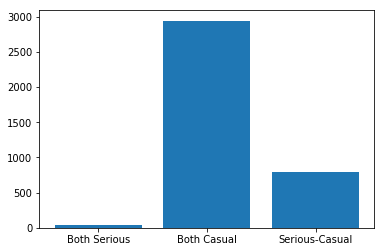

In [43]:
counts_df = combo_df.groupby(["seriousness_x", "seriousness_y"]).size().reset_index(name="times_met")
# s=serious, c=casual
ss = int(counts_df.loc[(counts_df.seriousness_x == 'serious') & (counts_df.seriousness_y == 'serious'), 'times_met'])
cc = int(counts_df.loc[(counts_df.seriousness_x == 'casual') & (counts_df.seriousness_y == 'casual'), 'times_met'])
cs = int(counts_df.loc[(counts_df.seriousness_x == 'casual') & (counts_df.seriousness_y == 'serious'), 'times_met'])
sc = int(counts_df.loc[(counts_df.seriousness_x == 'serious') & (counts_df.seriousness_y == 'casual'), 'times_met'])
sc = cs + sc

plt.bar(['Both Serious', 'Both Casual', 'Serious-Casual'],[ss, cc, sc])


Text(1.55, 1500, 'Note:\nMost pairings were of people with the same goal ')

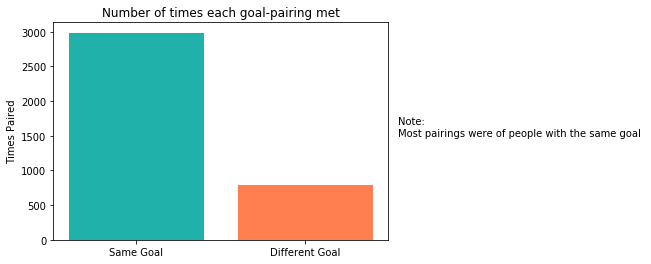

In [91]:
plt.bar(['Same Goal', 'Different Goal'], [ss+cc, sc],color=['lightseagreen','coral'])
plt.title("Number of times each goal-pairing met", loc='center')
plt.ylabel("Times Paired")
plt.text(1.55,1500, "Note:\nMost pairings were of people with the same goal ")


### Counting the _number_ of matches based on seriousness

In [10]:
#dropping non-match pairings
combo_df_matches.drop(combo_df[combo_df.match_x == 0].index, inplace=True)

#groupby number of matches based on serious-serious pairing
counts_df_matches = combo_df_matches.groupby(["seriousness_x", "seriousness_y"]).size().reset_index(name="times_matched")


In [11]:
#finding the counts. 'M' is a code added to these match counts, to distinguish them from the meeting counts above.
ssM = int(counts_df_matches.loc[(counts_df.seriousness_x == 'serious') & (counts_df_matches.seriousness_y == 'serious'), 'times_matched'])
ccM = int(counts_df_matches.loc[(counts_df.seriousness_x == 'casual') & (counts_df_matches.seriousness_y == 'casual'), 'times_matched'])
csM = int(counts_df_matches.loc[(counts_df.seriousness_x == 'casual') & (counts_df_matches.seriousness_y == 'serious'), 'times_matched'])
scM = int(counts_df_matches.loc[(counts_df.seriousness_x == 'serious') & (counts_df_matches.seriousness_y == 'casual'), 'times_matched'])
scM = csM + scM

<BarContainer object of 3 artists>

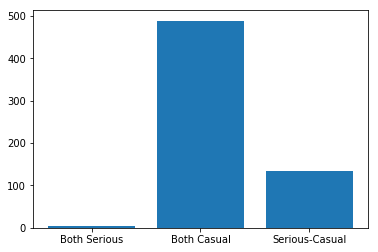

In [12]:
plt.bar(['Both Serious', 'Both Casual', 'Serious-Casual'],[ssM, ccM, scM])

Text(0, 0.5, 'Times Matched')

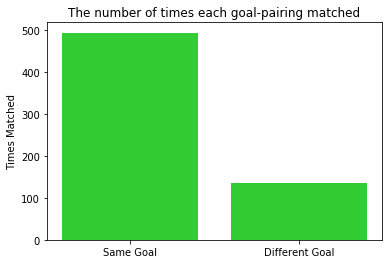

In [96]:
plt.bar(['Same Goal', 'Different Goal'], [ssM+ccM, scM],color='limegreen')
plt.title("The number of times each goal-pairing matched", loc='center')
plt.ylabel("Times Matched")

In [76]:
#test
print(f"SS: {ssM,ss,round(ssM/ss,2)}")
print(f"CC: {ccM,cc,round(ccM/cc,2)}")
print(f"SC: {scM,sc,round(scM/sc,2)}")

SS: (5, 44, 0.11)
CC: (489, 2943, 0.17)
SC: (135, 791, 0.17)


### Success rate of goal pairings. Calculating the _proportion_ of meetings of each goal-pairing that lead to a successful match

In [73]:
ssRate = (ssM/ss)*100
ccRate = (ccM/cc)*100
scRate = (scM/sc)*100

In [77]:
#test
print(ssM/ss*100)
print(ccM/cc*100)
print(scM/sc*100)

11.363636363636363
16.615698267074414
17.06700379266751


Text(0, 0.5, 'Success Rate %')

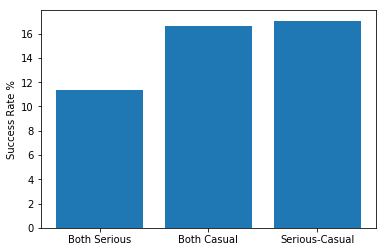

In [70]:
plt.bar(['Both Serious', 'Both Casual', 'Serious-Casual'], [ssRate, ccRate, scRate])
plt.ylabel("Success Rate %")

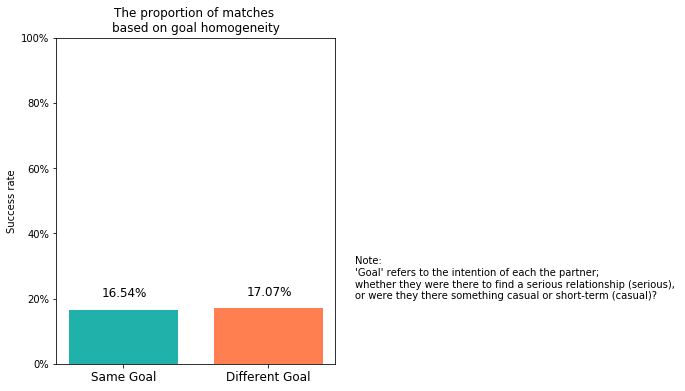

In [68]:
fig = plt.figure(figsize=(5,6))

# list of x-axis locations for the bars
locations = [.5,.7]

graph = plt.bar(locations, 
        [(ssM+ccM)/(ss+cc)*100,(scM/sc)*100], 
        color=['lightseagreen','coral'], 
        width=[.15,.15])

plt.ylabel("Success rate")
plt.xticks(locations,['Same Goal', 'Different Goal'], fontsize=12)
plt.yticks([0,20,40,60,80,100],['0%','20%','40%','60%','80%','100%'])
plt.title("The proportion of matches \nbased on goal homogeneity", loc='center')

plt.text(.82,20,"Note:\n'Goal' refers to the intention of each the partner; \n\
whether they were there to find a serious relationship (serious), \n\
or were they there something casual or short-term (casual)?")

#adds percentages on top of bars
for p in graph.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate('{:.2%}'.format(height/100), (x+.045, y + height + 4), fontsize=12)

    

### Conclusion:
#### The results show that having the same goal does not lead to more success.
#### Likewise, opposing goals lead to roughly the same outcome as similar goals.